In [11]:
#Importar PySpark e criar sessão
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("PipelineBigData") \
    .getOrCreate()

print("Sessão Spark criada 🚀")

#Definir caminho do CSV
caminho = "/home/luiggi/Documentos/Projetos/Bleed It Out (Pipeline de Big Data com PySpark)/student_exam_scores.csv"

#Carregar CSV com PySpark
df = spark.read.csv(caminho, header=True, inferSchema=True)

#Visualizar primeiros registros
df.show(5)
df.printSchema()

from pyspark.sql.functions import col, round

# Criar coluna de média usando exam_score e previous_scores
df = df.withColumn("Media", round((col("exam_score") + col("previous_scores"))/2, 2))

# Filtrar estudantes com média acima de 50 (ajuste conforme quiser)
df_top = df.filter(col("Media") > 50)

df_top.show(5)


Sessão Spark criada 🚀
+----------+-------------+-----------+------------------+---------------+----------+
|student_id|hours_studied|sleep_hours|attendance_percent|previous_scores|exam_score|
+----------+-------------+-----------+------------------+---------------+----------+
|      S001|          8.0|        8.8|              72.1|             45|      30.2|
|      S002|          1.3|        8.6|              60.7|             55|      25.0|
|      S003|          4.0|        8.2|              73.7|             86|      35.8|
|      S004|          3.5|        4.8|              95.1|             66|      34.0|
|      S005|          9.1|        6.4|              89.8|             71|      40.3|
+----------+-------------+-----------+------------------+---------------+----------+
only showing top 5 rows
root
 |-- student_id: string (nullable = true)
 |-- hours_studied: double (nullable = true)
 |-- sleep_hours: double (nullable = true)
 |-- attendance_percent: double (nullable = true)
 |--

In [16]:
#Salvar como Parquet
df.write.mode("overwrite").parquet(
    "/home/luiggi/Documentos/Projetos/Bleed It Out (Pipeline de Big Data com PySpark)/student_scores.parquet"
)
print("Salvo como Parquet ✅")

#Salvar como CSV
df.write.mode("overwrite").option("header", True).csv(
    "/home/luiggi/Documentos/Projetos/Bleed It Out (Pipeline de Big Data com PySpark)/student_scores_csv"
)
print("Salvo como CSV ✅")


Salvo como Parquet ✅
Salvo como CSV ✅


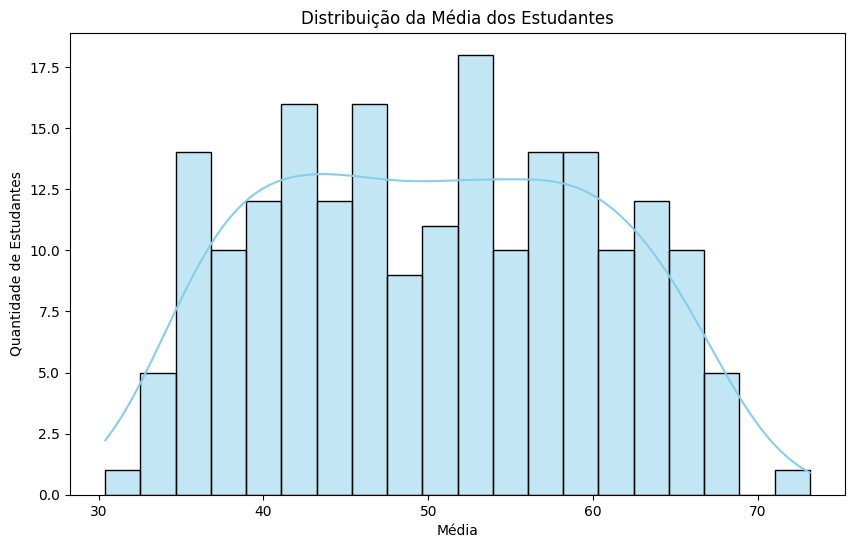

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,Media
86,S087,12.0,8.2,71.0,95,51.3,73.15
167,S168,8.4,7.5,98.0,95,42.0,68.50
83,S084,10.9,5.3,87.7,88,48.9,68.45
82,S083,7.4,7.2,67.6,95,39.8,67.40
174,S175,9.9,5.8,63.5,90,44.8,67.40


In [19]:
# Converter para Pandas
df_pandas = df.toPandas()

# Gráfico com Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_pandas['Media'], bins=20, kde=True, color="skyblue")
plt.title("Distribuição da Média dos Estudantes")
plt.xlabel("Média")
plt.ylabel("Quantidade de Estudantes")
plt.show()

#Top 5 estudantes
df_pandas.sort_values(by="Media", ascending=False).head(5)
